<a href="https://colab.research.google.com/github/xuyi0619/Past-work-of-statistical-analysis/blob/main/Text%20Analysis%2C%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Build a classification model using text data

In part one of the homework, you will solve a text classification task.

The training data is also stored in the HW 4 data folder.   You can import it and train test split it to generate your data for this assignment.

If you have any difficulty reading in the data, try to use the squeeze argument in pandas read_csv()


In [ ]:
import pandas as pd

X_train=pd.read_csv("/content/X_train(1)(1).csv", squeeze=True)

y_train_labels=pd.read_csv("/content/y_train(1)(1).csv", squeeze=True)


<ipython-input-9-61d0677a23c0>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_train=pd.read_csv("/content/X_train(1)(1).csv", squeeze=True)
<ipython-input-9-61d0677a23c0>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train_labels=pd.read_csv("/content/y_train(1)(1).csv", squeeze=True)


In [ ]:
# one encode Y data
y_train = pd.get_dummies(y_train_labels)
y_train = y_train.apply(lambda x: x.argmax(), axis=1).values

Import the text data, vectorize the clickbait headline column into an X matrix.

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
X_train = count.fit_transform(X_train)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)


print(X_train.shape)
print(y_train.shape)

(18734, 20332)
(18734,)


Then run logistic regression at least three times and select a single best model.  Note that you should create three logistic regression models with different different tokenization approaches.  You should not change your modeling approach, you should simply experiment with different tokenizers. Be sure to explain your choices and evaluate your models using cross validation and using test set data.

Model 1 (plain)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.95
Best parameters:  {'C': 0.1}


In [ ]:
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.95


In [ ]:
# visualize coefficients
def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

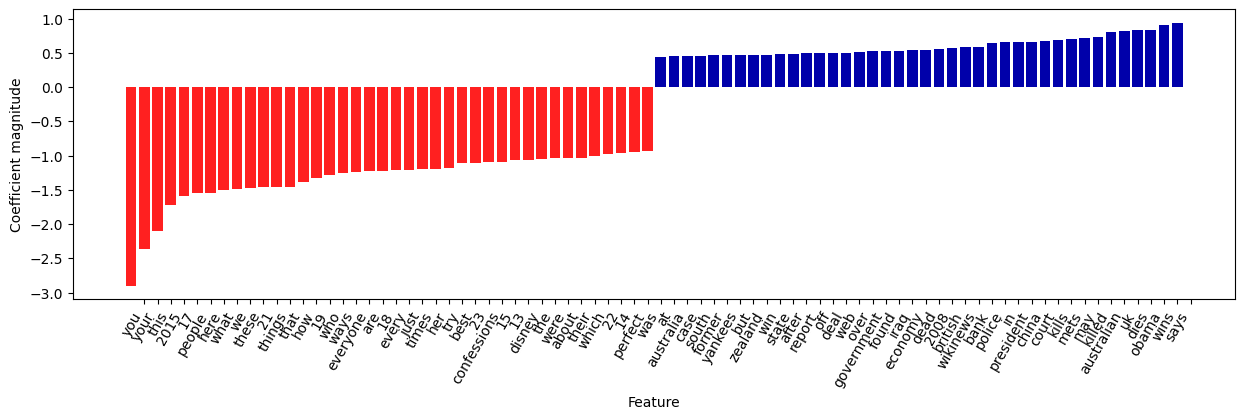

In [ ]:
import matplotlib.pyplot as plt

coefs = LogisticRegression(C=0.1).fit(X_train,y_train).coef_
feature_names = count.get_feature_names_out()

visualize_coefficients(coefs, feature_names, n_top_features=40)


Model 2 (at least in 10 docs and tf-idf)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train=pd.read_csv("/content/X_train(1)(1).csv", squeeze=True)
y_train_labels=pd.read_csv("/content/y_train(1)(1).csv", squeeze=True)
# one encode Y data
y_train = pd.get_dummies(y_train_labels)
y_train = y_train.apply(lambda x: x.argmax(), axis=1).values
vect = TfidfVectorizer(min_df=10, norm=None).fit(X_train)
X_train = vect.transform(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

<ipython-input-306-c3647811f8b8>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_train=pd.read_csv("/content/X_train(1)(1).csv", squeeze=True)
<ipython-input-306-c3647811f8b8>:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train_labels=pd.read_csv("/content/y_train(1)(1).csv", squeeze=True)


Best cross-validation score: 0.97
Best parameters:  {'C': 0.1}


In [ ]:
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.97


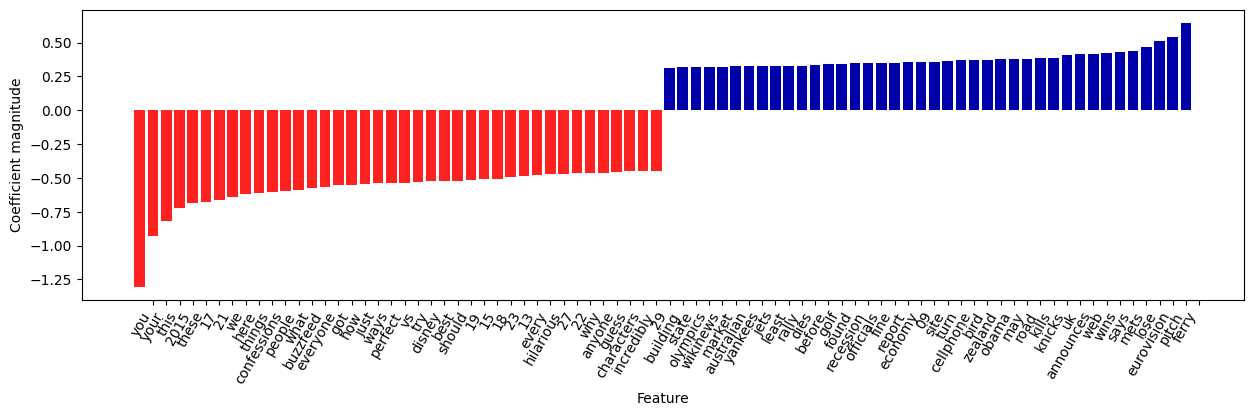

In [ ]:
coefs = LogisticRegression(C=0.1).fit(X_train,y_train).coef_
feature_names = vect.get_feature_names_out()

visualize_coefficients(coefs, feature_names, n_top_features=40)

Model 3 (at least in 10 docs and remove stopwords)

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

X_train=pd.read_csv("/content/X_train(1)(1).csv", squeeze=True)
y_train_labels=pd.read_csv("/content/y_train(1)(1).csv", squeeze=True)
# one encode Y data
y_train = pd.get_dummies(y_train_labels)
y_train = y_train.apply(lambda x: x.argmax(), axis=1).values
count = CountVectorizer(min_df=10, stop_words="english")
X_train = count.fit_transform(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

<ipython-input-308-442258422745>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_train=pd.read_csv("/content/X_train(1)(1).csv", squeeze=True)
<ipython-input-308-442258422745>:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train_labels=pd.read_csv("/content/y_train(1)(1).csv", squeeze=True)


Best cross-validation score: 0.93
Best parameters:  {'C': 0.1}


In [ ]:
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.93


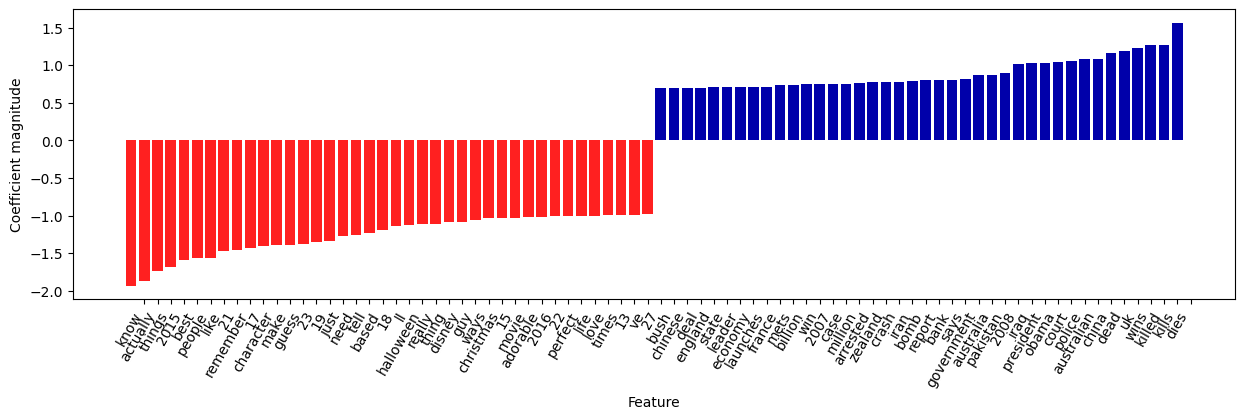

In [ ]:
coefs = LogisticRegression(C=0.1).fit(X_train,y_train).coef_
feature_names = count.get_feature_names_out()

visualize_coefficients(coefs, feature_names, n_top_features=40)

Three models: Model 1 is the basic model without removing stop words or limiting minimal appearance in documents… It gives out a cross-validation f1 score of 0.95. The score on the test set is the same as the score on the training set.


Model 2 sets some limits. It narrows the bag of words to words in at least 10 documents. It also rescales the data with tf-idf, which reflects how important a word is to a document in corpus. It is an effective way to weigh the words based on importance rather than frequency(for example, words like ‘the’ have no unique meaning but appear frequently). It gives out a cross-validation f1 score of 0.97. The score on the test set is the same as the score on the training set.


Model 3 narrows the bag of words to words in at least 10 documents and removes stop words. It gives out a cross-validation f1 score of 0.93. The score on the test set is the same as the score on the training set.


Inspect all models by coefficients: Model 1 suggests that headlines that contains words such as ‘obama’, ‘court’, ‘kills’, ‘dies’, ‘australian’... are more likely to be clicked on (higher coefficient magnitude), while headlines contain ‘you’, ‘your’, ‘people’... are less likely to be clicked on. Although the result is generally promising, there are still some words that receive questionably high coefficients, for example ‘at’, ‘but’, ‘in’, and ‘may’.


Model 2 creates the most reliable chart. While vague and general words (such as ‘you’, ‘things’, ‘got’) and numbers have lower coefficient magnitude, precise words such as ‘knicks’, ‘yankees’, ‘olympics’, ‘jets’, and ‘golf’ are more likely to receive more clicks.


Model 3 provides relatively reliable insights to words with positive coefficients, most questioning decisions happen at negative coefficients. For example, ‘disney’, ‘christmas’, ‘halloween’, ‘movie’ are words that people intuitively think attractives attention.


Evaluate using cross validation and test set data: F1 score is a way to measure accuracy. It takes both precision and recall into account. Precision is how many of the samples predicted as positive are actually positive. Recall is how many of the positive samples are captured by the positive predictions. Model 2 has the highest test score while model 3 has the lowest test score.


Choice: Among the three models, model 3 is the best choice. It has the highest f1 score, and  assigns most reliable coefficients. It has tf-idf, which is widely used today in most text-based recommender systems in digital libraries.



Part 2: Build a predictive neural network using Keras

2.1 Train test split the iris dataset.

In [ ]:
df = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv")

In [ ]:
df = df.drop(["Unnamed: 0"], axis=1)
df.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
y = df['Species']
X = df.loc[:, df.columns != 'Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train = pd.get_dummies(y_train)
y_train = y_train.apply(lambda x: x.argmax(), axis=1).values
y_test = pd.get_dummies(y_test)
y_test = y_test.apply(lambda x: x.argmax(), axis=1).values


2.2 Run a multilayer perceptron (feed forward neural network) with two hidden layers on the iris dataset using the keras Sequential interface.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(112, 4)
(38, 4)
(112,)


In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
model = Sequential()
model.add(Dense(28, activation='relu', input_dim=4))
model.add(Dense(28, activation='relu', input_dim=4))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='sgd',
              loss= loss,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_split=0.20, epochs=4, batch_size=28)

Epoch 1/4
4/4 [==============================] - 1s 90ms/step - loss: 1.7984 - accuracy: 0.5955 - val_loss: 1.5472 - val_accuracy: 0.5217
Epoch 2/4
4/4 [==============================] - 0s 12ms/step - loss: 1.2939 - accuracy: 0.6966 - val_loss: 1.1604 - val_accuracy: 0.1739
Epoch 3/4
4/4 [==============================] - 0s 12ms/step - loss: 1.1287 - accuracy: 0.4944 - val_loss: 1.0288 - val_accuracy: 0.4783
Epoch 4/4
4/4 [==============================] - 0s 12ms/step - loss: 1.0650 - accuracy: 0.4045 - val_loss: 1.0219 - val_accuracy: 0.3913


In [ ]:
score = model.evaluate(X_test, y_test, batch_size=16)
print(score)

3/3 [==============================] - 0s 4ms/step - loss: 0.9450 - accuracy: 0.5789
[0.9449895620346069, 0.5789473652839661]


2.3 Fit two models with different numbers of hidden layers and or hidden neurons and evaluate each on a test-set.  

In [ ]:
# Model 1
model_1 = Sequential()
model_1.add(Dense(56, activation='relu', input_dim=4))
model_1.add(Dense(56, activation='relu', input_dim=4))
model_1.add(Dense(4, activation='softmax'))
model_1.compile(optimizer='sgd',
              loss= loss,
              metrics=['accuracy'])

model_1.fit(X_train, y_train, validation_split=0.20, epochs=4, batch_size=56)

Epoch 1/4
2/2 [==============================] - 3s 745ms/step - loss: 1.6359 - accuracy: 0.1011 - val_loss: 1.1659 - val_accuracy: 0.5217
Epoch 2/4
2/2 [==============================] - 0s 168ms/step - loss: 1.1977 - accuracy: 0.4270 - val_loss: 1.0201 - val_accuracy: 0.6957
Epoch 3/4
2/2 [==============================] - 0s 190ms/step - loss: 1.0352 - accuracy: 0.6404 - val_loss: 0.9497 - val_accuracy: 0.6957
Epoch 4/4
2/2 [==============================] - 0s 196ms/step - loss: 0.9491 - accuracy: 0.6404 - val_loss: 0.8999 - val_accuracy: 0.6957


In [ ]:
score = model_1.evaluate(X_test, y_test, batch_size=16)
print(score)

3/3 [==============================] - 0s 6ms/step - loss: 0.8722 - accuracy: 0.7368
[0.8722230792045593, 0.7368420958518982]


In [ ]:
# Model 2
model_2 = Sequential()
model_2.add(Dense(28, activation='relu', input_dim=4))
model_2.add(Dense(28, activation='relu'))
model_2.add(Dense(28, activation='relu'))
model_2.add(Dense(28, activation='relu'))
model_2.add(Dense(4, activation='softmax'))
model_2.compile(optimizer='sgd',
              loss= loss,
              metrics=['accuracy'])

model_2.fit(X_train, y_train, validation_split=0.20, epochs=4, batch_size=56)

Epoch 1/4
2/2 [==============================] - 2s 345ms/step - loss: 1.3227 - accuracy: 0.6404 - val_loss: 1.2752 - val_accuracy: 0.6957
Epoch 2/4
2/2 [==============================] - 0s 34ms/step - loss: 1.3045 - accuracy: 0.6404 - val_loss: 1.2569 - val_accuracy: 0.6957
Epoch 3/4
2/2 [==============================] - 0s 35ms/step - loss: 1.2906 - accuracy: 0.6292 - val_loss: 1.2404 - val_accuracy: 0.6957
Epoch 4/4
2/2 [==============================] - 0s 34ms/step - loss: 1.2772 - accuracy: 0.6292 - val_loss: 1.2229 - val_accuracy: 0.6957


In [ ]:
score = model_2.evaluate(X_test, y_test, batch_size=16)
print(score)

3/3 [==============================] - 0s 10ms/step - loss: 1.2550 - accuracy: 0.7105
[1.2550021409988403, 0.7105262875556946]


2.4 Describe the differences in the predictive accuracy of models with different numbers of hidden units/neurons.  

Model 1 has two hidden layers and 56 neurons. It has an accuracy of 0.74 (doubles the number of hidden neurons of the original model).  Model 2 has four hidden layers and 28 hidden neurons (doubles the number of hidden layers of the first model). It has an accuracy of 0.71. Since more neurons and more hidden layers add to the complexity of the model, both models perform better than the original model with 28 hidden neurons and 2 hidden layers. Between model 1 and 2, model 1 performs slightly better than model 2.


2.5 Describe the predictive strength of your best model.  Be sure to explain your choice and evaluate this model using the test set.


Although the accuracy for model 1 on training data jumps around between 0.10 to 0.64, the model has an accuracy around 0.64 on the training data. Model 1 has higher accuracy on test data. In addition, loss function is a function that compares the target and the predicted output values. We want to minimize this value. Compared to model 2, which has a loss of 1.26, model has a loss of 0.87 (this is for the test data).
